In [2]:
#Tahmid Shahriar Bhuiyan     ID: 2017-3-60-009
#Faria Islam Leha            ID: 2017-3-60-011
#Shahriar Imon               ID: 2017-3-60-012
#Shahriar Alam Niloy         ID: 2017-3-60-046

import tensorflow as tf             #TensorFlow is an open source library for numerical computation and large-scale machine learning. TensorFlow bundles together a slew of machine learning and deep learning (aka neural networking) models and algorithms and makes them useful by way of a common metaphor.
import matplotlib.pyplot as plt     #creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
import zipfile                      
import cv2                          #processes image
import os                           #provides functions for interacting with the operating system
import numpy as np                  #works with arrays
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator #labels images
from tensorflow.keras.preprocessing import image
from playsound import playsound #plays audio

In [3]:
img = image.load_img("train/happy/2.jpg")

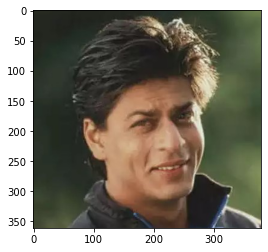

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("train/happy/2.jpg").shape    #shape of 3D array

(361, 378, 3)

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255)           #dataset generation & normalization
validation_datagen = ImageDataGenerator(rescale=1/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        'train',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1217 images belonging to 2 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
        'validation/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1222 images belonging to 2 classes.


In [9]:
train_generator.class_indices #see generated labels

{'happy': 0, 'not_happy': 1}

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), # converts into 1D array
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), #connects all layers
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
from tensorflow.keras.optimizers import RMSprop # optimizes the model and sets learning rate

In [12]:
model.compile(loss='binary_crossentropy', #determines loss
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.optimizers import RMSprop

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,  
      epochs=30,
      validation_data = validation_generator) #train the model with inputs

Epoch 1/30
5/5 [==============================] - 22s 4s/step - loss: 0.5313 - accuracy: 0.6742 - val_loss: 0.4458 - val_accuracy: 0.8282
Epoch 2/30
5/5 [==============================] - 10s 2s/step - loss: 0.4291 - accuracy: 0.8281 - val_loss: 0.3936 - val_accuracy: 0.8282
Epoch 3/30
5/5 [==============================] - 8s 2s/step - loss: 0.4036 - accuracy: 0.8232 - val_loss: 0.3786 - val_accuracy: 0.8282
Epoch 4/30
5/5 [==============================] - 8s 2s/step - loss: 0.3688 - accuracy: 0.8492 - val_loss: 0.3151 - val_accuracy: 0.8437
Epoch 5/30
5/5 [==============================] - 9s 2s/step - loss: 0.3095 - accuracy: 0.8531 - val_loss: 0.2837 - val_accuracy: 0.8552
Epoch 6/30
5/5 [==============================] - 8s 2s/step - loss: 0.2806 - accuracy: 0.8797 - val_loss: 0.2715 - val_accuracy: 0.9370
Epoch 7/30
5/5 [==============================] - 8s 2s/step - loss: 0.3035 - accuracy: 0.8922 - val_loss: 0.2478 - val_accuracy: 0.9386
Epoch 8/30
5/5 [=======================

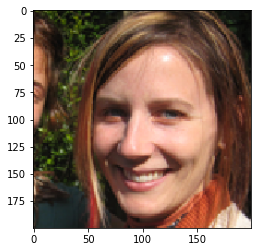

You are happy


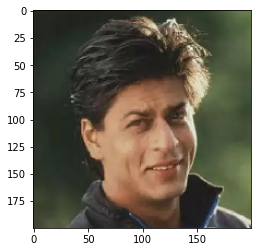

You are happy


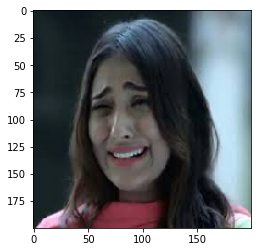

you are sad


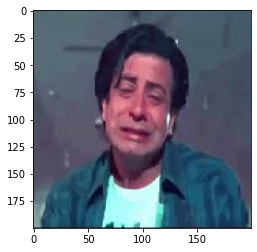

you are sad


In [19]:
import tensorflow as tf             #TensorFlow is an open source library for numerical computation and large-scale machine learning. TensorFlow bundles together a slew of machine learning and deep learning (aka neural networking) models and algorithms and makes them useful by way of a common metaphor.
import matplotlib.pyplot as plt     #creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
import zipfile                      
import cv2                          #processes image
import os                           #provides functions for interacting with the operating system
import numpy as np                  #works with arrays
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator #labels images
from tensorflow.keras.preprocessing import image
from playsound import playsound #plays audio
dir_path = "test"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        playsound("happy.wav")
        print("You are happy")
 
    else:
        playsound("sad.wav")
        print("you are sad")